<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 4. MLP avanzado</font></h1>

<h1><font color="#113D68" size=4>3. Análisis de entrenamiento</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Historial de entrenamiento](#section1)
* [2. Visualizar el historial](#section2)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

En esta lección, aprenderemos a revisar y visualizar el rendimiento de los modelos a lo largo del tiempo durante el entrenamiento. Después de completar esta lección, sabrá:
* Cómo inspeccionar las métricas del historial.
* Cómo trazar métricas de Accuracy durante el entrenamiento.
* Cómo trazar métricas de pérdida durante el entrenamiento.

In [1]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Historial de entrenamiento</font>

Keras registra métricas de entrenamiento para cada época. Esto incluye la pérdida y el Accuracy (para problemas de clasificación). El histórico se devuelve de las llamadas a la función `fit()` utilizada para entrenar el modelo.

Las métricas se almacenan en un diccionario en el histórico del objeto devuelto:
```Python
    # list all data in history
    print(history.history.keys())
```

Por ejemplo, para un modelo en un problema de clasificación se produce la siguiente lista:
```Python
    ['loss', 'accuracy', 'val_loss', 'val_accuracy']
```

Podemos utilizar los datos recopilados para crear gráficas que nos proporciona información sobre:
* La velocidad de convergencia sobre épocas (pendiente).
* Si el modelo puede haber convergido ya (meseta).
* Si el modelo tiene _overfitting_ (inflexión para la línea de validación).

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Visualizar el historial</font>

El ejemplo recopila el historial y crea dos gráficos:
1. Un gráfico de Accuracy durante épocas de entrenamiento.
2. Un gráfico de la pérdida (Loss) durante épocas de entrenamiento.

In [4]:
# Visualize training history
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# load pima indians dataset
from google.colab import drive
drive.mount('/content/drive')
path= "/content/drive/MyDrive/CursoDeepLearning/Datasets/pima-indians-diabetes.csv"

dataset= np.loadtxt(path, delimiter=',')

# split into input (X) and output (Y) variables
x= dataset[:,0:8]
y= dataset[:,8]

# create model
model= Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Fit the model
history= model.fit(x,y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


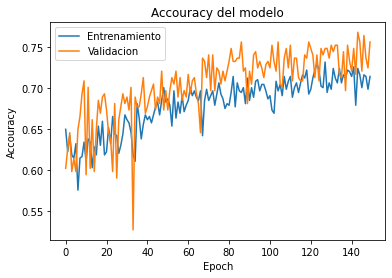

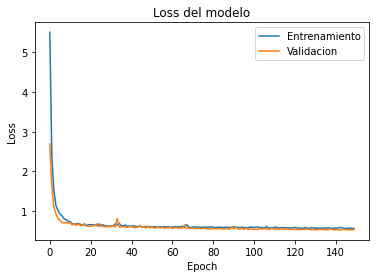

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accouracy del modelo')
plt.ylabel('Accouracy')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento','Validacion'])
plt.show()

# summarize history for loss
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento','Validacion'])
plt.show()

* A partir del gráfico de Accuracy, podemos ver que el modelo podría entrenarse un poco más, la tendencia sigue aumentando durante las últimas épocas. 
    * No hay _overfitting_ ya que muestra una habilidad comparable en ambos conjuntos de datos.

* Respecto a la pérdida, se obtiene un rendimiento comparableen train/test. 
    * Si las líneas paralelas comienzan a desviarse de manera constante, podría ser una señal de dejar de entrenar en una época anterior. 

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>